In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
start_date = "2010-07-21"
end_date = "2023-07-21"

ticker_symbol = "AAPL"

df = yf.download(ticker_symbol, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [3]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-07-21,9.467500,9.469643,9.071429,9.080000,7.717481,1185671200
2010-07-22,9.202857,9.285714,9.118214,9.250714,7.862576,645318800
2010-07-23,9.181786,9.299286,9.152857,9.283571,7.890503,533388800
2010-07-26,9.285714,9.289286,9.203929,9.260000,7.870470,420551600
2010-07-27,9.316786,9.457143,9.296429,9.431429,8.016174,584771600
...,...,...,...,...,...,...
2020-07-14,94.839996,97.254997,93.877502,97.057503,95.291214,170989200
2020-07-15,98.989998,99.247498,96.489998,97.724998,95.946564,153198000
2020-07-16,96.562500,97.404999,95.904999,96.522499,94.765953,110577600


In [4]:
df.set_axis(['Open','High','Low','Close','Adj Close','Volume'], axis='columns')
df.shape

(2517, 6)

In [5]:
df=df.drop(['Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-07-21,9.467500,9.469643,9.071429,9.080000,1185671200
2010-07-22,9.202857,9.285714,9.118214,9.250714,645318800
2010-07-23,9.181786,9.299286,9.152857,9.283571,533388800
2010-07-26,9.285714,9.289286,9.203929,9.260000,420551600
2010-07-27,9.316786,9.457143,9.296429,9.431429,584771600


In [6]:
df.reset_index(drop=True, inplace=True)
df.head()

,Open,High,Low,Close,Volume
0,9.467500,9.469643,9.071429,9.080000,1185671200
1,9.202857,9.285714,9.118214,9.250714,645318800
2,9.181786,9.299286,9.152857,9.283571,533388800
3,9.285714,9.289286,9.203929,9.260000,420551600
4,9.316786,9.457143,9.296429,9.431429,584771600


In [7]:
df.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

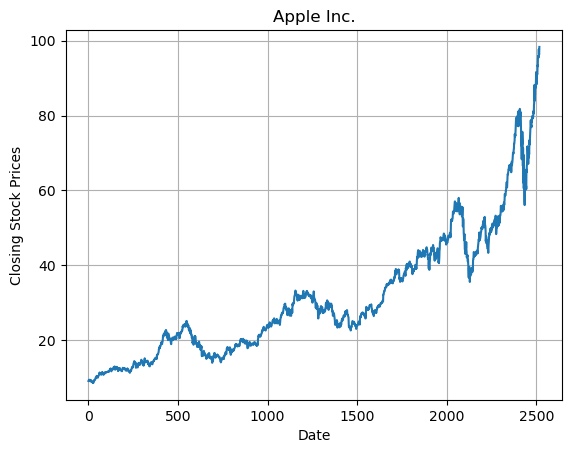

In [8]:
close = df['Close']
ax = close.plot(title='Apple Inc.')
ax.set_xlabel('Date')
ax.set_ylabel('Closing Stock Prices')
ax.grid()
plt.show()

In [9]:
## Find the mean of the closing values of the previous 100 days - MOVING AVERAGE

ma100=df.Close.rolling(100).mean() ## moving average is calculated by the rolling function
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    76.082825
2513    76.277450
2514    76.497225
2515    76.740300
2516    76.992250
Name: Close, Length: 2517, dtype: float64

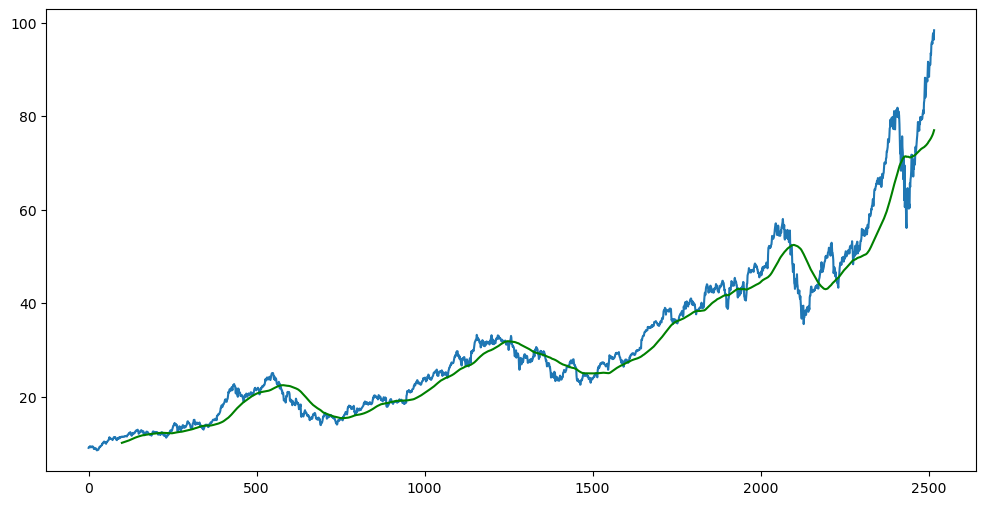

In [10]:
## Plot the graph for moving average for 100 days against original closing values

plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'g')

In [11]:
## Find the mean of the closing values of the previous 200 days - MOVING AVERAGE

ma200=df.Close.rolling(200).mean() ## moving average is calculated by the rolling function
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    72.588125
2513    72.803225
2514    73.005875
2515    73.206775
2516    73.424862
Name: Close, Length: 2517, dtype: float64

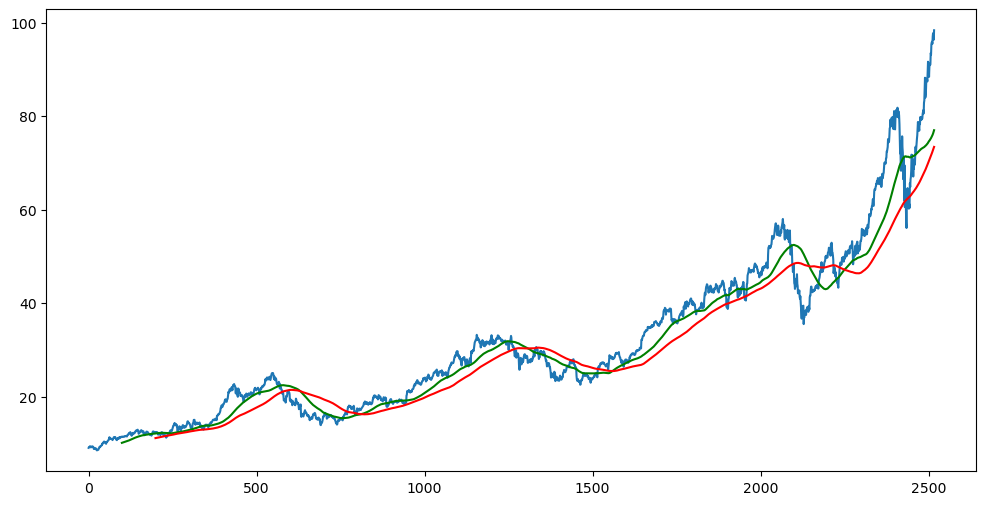

In [12]:
## Plot the graph for moving average for 100 days vs 200 days vs original closing values

plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'g')
plt.plot(ma200,'r')

In [13]:
df.shape

(2517, 5)

In [14]:
# Splitting Data into 70% Train and 30% Test Set

train=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
test=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(train.shape)
print(test.shape)

(1761, 1)
(756, 1)


In [15]:
## Scaling down the data to 0 and 1 to be useable in an LSTM Model

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [16]:
## Convert Training Data into Array

train_arr=scaler.fit_transform(train)
train_arr

array([[0.0167806 ],
       [0.02238587],
       [0.0234647 ],
       ...,
       [0.94204758],
       [0.94631606],
       [0.95058453]])

In [17]:
train_arr.shape

(1761, 1)

In [18]:
x_train=[] ## List to save the trained values
y_train=[] ## List to save the predicted values

for i in range(100,train_arr.shape[0]):  ## Train the data on the first 100 values
    x_train.append(train_arr[i-100:i])
    y_train.append(train_arr[i,0])

x_train , y_train = np.array(x_train),np.array(y_train) ## Convert to numpy array to make it fit for model

In [19]:
from keras.layers import Dense , Dropout , LSTM
from keras.models import Sequential

## Creating a Sequential Model

model = Sequential()

## Layer 1

model.add(LSTM(units=50, activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

## Layer 2

model.add(LSTM(units=60, activation='relu',return_sequences=True))
model.add(Dropout(0.3))

## Layer 3

model.add(LSTM(units=80, activation='relu',return_sequences=True))
model.add(Dropout(0.4))

## Layer 4

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1)) ## Dense Layer is used to connect all other layers
                          ## Unit is 1 as we predict only the closing stock values

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
dropout (Dropout)            (None, 100, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 60)           26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 60)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 80)           45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 80)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [21]:
model.compile(optimizer="adam",loss="mean_squared_error")
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
52/52 [==============================] - 9s 175ms/step - loss: 0.0560
Epoch 2/50
52/52 [==============================] - 9s 175ms/step - loss: 0.0096
Epoch 3/50
52/52 [==============================] - 10s 188ms/step - loss: 0.0089
Epoch 4/50
52/52 [==============================] - 10s 196ms/step - loss: 0.0078
Epoch 5/50
52/52 [==============================] - 9s 181ms/step - loss: 0.0077
Epoch 6/50
52/52 [==============================] - 9s 178ms/step - loss: 0.0065
Epoch 7/50
52/52 [==============================] - 10s 183ms/step - loss: 0.0069
Epoch 8/50
52/52 [==============================] - 9s 182ms/step - loss: 0.0059
Epoch 9/50
52/52 [==============================] - 9s 182ms/step - loss: 0.0068
Epoch 10/50
52/52 [==============================] - 9s 182ms/step - loss: 0.0060
Epoch 11/50
52/52 [==============================] - 9s 182ms/step - loss: 0.0062
Epoch 12/50
52/52 [==============================] - 10s 183ms/step - loss: 0.0052
Epoch 13/50
52/52 [==

In [22]:
model.save('Trained_model.h5')

In [23]:
train.tail(100)

,Close
1661,34.165001
1662,34.232498
1663,34.247501
1664,34.947498
1665,34.740002
...,...
1756,36.435001
1757,36.942501
1758,37.259998
1759,37.389999


In [24]:
test.head()

,Close
1761,37.755001
1762,37.584999
1763,37.567501
1764,38.022499
1765,38.185001


In [25]:
## Extract last 100 days (rows) from training dataset
## store it in a variable to predict the value of the next day as test dataset - TIME SERIES ANALYSIS

past_100_days = train.tail(100)

final_df = past_100_days.append(test,ignore_index=True) ## Connect Last 100 days training data with the test data

final_df.head()

,Close
0,34.165001
1,34.232498
2,34.247501
3,34.947498
4,34.740002


In [26]:
final_df.isna().sum()

Close    0
dtype: int64

In [27]:
## Perform Scaling of data to be suitable for model

input_data = scaler.fit_transform(final_df)
input_data

array([[0.        ],
       [0.00105148],
       [0.0012852 ],
       [0.01218986],
       [0.00895744],
       [0.01215093],
       [0.01043733],
       [0.01113838],
       [0.0091132 ],
       [0.00786692],
       [0.00965843],
       [0.0098921 ],
       [0.00907428],
       [0.01479925],
       [0.01569498],
       [0.01296881],
       [0.01869379],
       [0.0123846 ],
       [0.01853797],
       [0.0165907 ],
       [0.01550024],
       [0.01643495],
       [0.02780699],
       [0.02905321],
       [0.02831323],
       [0.02726175],
       [0.02741751],
       [0.03158469],
       [0.02866379],
       [0.02726175],
       [0.02601547],
       [0.02535341],
       [0.01935585],
       [0.02001791],
       [0.01709701],
       [0.02013474],
       [0.01768117],
       [0.01565599],
       [0.02251041],
       [0.02184835],
       [0.02718385],
       [0.03064998],
       [0.0273396 ],
       [0.027768  ],
       [0.02722277],
       [0.03863379],
       [0.04225568],
       [0.040

In [28]:
input_data.shape

(856, 1)

In [29]:
x_test=[] ## List to save the testing values
y_test=[] ## List to save the predicted values

for i in range(100,input_data.shape[0]):  ## Test the data on the first 100 values
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
    
x_test , y_test = np.array(x_test),np.array(y_test) ## Convert to numpy array to make it fit for model

In [30]:
print(x_test.shape)
print(y_test.shape)

(756, 100, 1)
(756,)


In [31]:
y_predicted=model.predict(x_test)

y_predicted.shape

(756, 1)

In [33]:
## Find Factor by which the values have been scaled down

scaler.scale_

array([0.01557814])

In [34]:
## Convert values to original form so that they can be plotted

scale_factor = 1/0.01557814
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

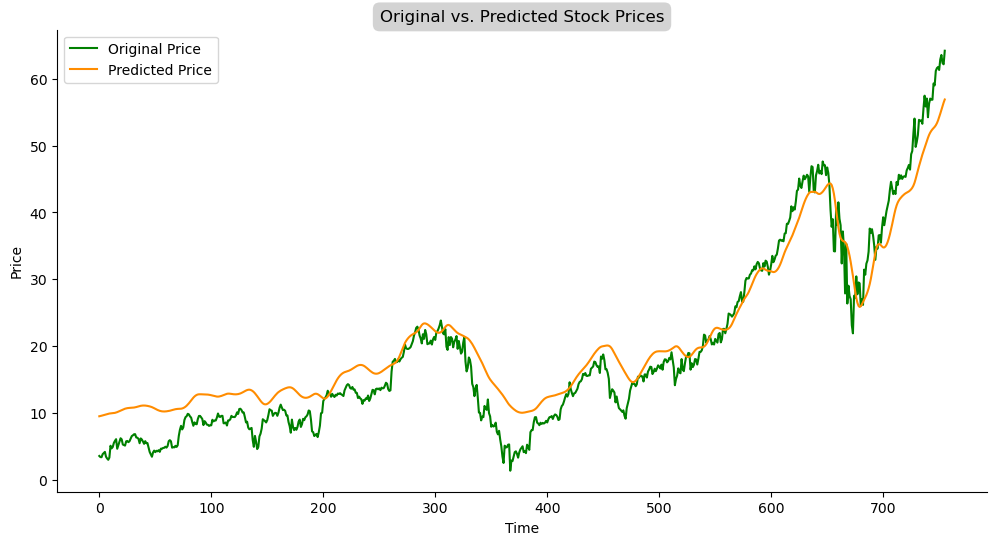

In [36]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'g',label='Original Price')
plt.plot(y_predicted,'darkorange',label='Predicted Price')
plt.title('Original vs. Predicted Stock Prices', loc='center', bbox=dict(facecolor='lightgray', edgecolor='white', boxstyle='round,pad=0.5',linewidth=2
))
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming you already have y_predicted and y_test in their original form

# 1. Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_predicted)

# 2. Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_predicted, squared=False)

# 3. Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_predicted)

# 4. Calculate R-squared (R²)
r_squared = r2_score(y_test, y_predicted)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r_squared)

Mean Squared Error (MSE): 16.15468884625719
Root Mean Squared Error (RMSE): 4.019289594724071
Mean Absolute Error (MAE): 3.4042120123112283
R-squared (R²): 0.9165813291619156
